# AIM : TO LEARN HOW TO USE KERA S AND ANN !

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### LOADING THE DATASET

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.shape

(10000, 14)

In [6]:
#let's drop the unnecesary columns : like there is no point of row number as we are only doing this to learn how to use keras
# we can drop customer id , surname (could be useful but let's drop it for now)

data_new = data.drop(['RowNumber' , 'CustomerId', 'Surname'] , axis=1)

In [7]:
data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#Let's check either data is duplicate or not
data_new.duplicated().sum()

0

Conclusion: doesn't have any duplicated row!

In [9]:
data_new.shape

(10000, 11)

### Basic analysis 

In [10]:
data_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
data_new['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
data_new['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
#Now we will encode categorical columns into numerical 

In [14]:
df = pd.get_dummies(data_new , columns = ['Gender' , 'Geography'] )

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [16]:
#  right now we are getting 3 columns after encoding geography and 2 columns for gender so to reduce colinearity .
df = pd.get_dummies(data_new , columns = ['Gender' , 'Geography'] , drop_first = True )

In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


### Modelling

In [18]:
# dependent and independent features

X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [19]:
X.shape

(10000, 11)

In [20]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [21]:
# train and testing splitting of data
from sklearn.model_selection import train_test_split 

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size =0.3 )

In [23]:
X_train.shape

(7000, 11)

In [24]:
X_test.shape

(3000, 11)

In [25]:
y_train.shape

(7000,)

In [26]:
y_test.shape

(3000,)

In [27]:
# Scaling the numerical values 
from sklearn.preprocessing import StandardScaler 

In [28]:
scale = StandardScaler()

In [29]:
x_train_scal = scale.fit_transform(X_train)
x_train_scal

array([[ 0.26557908, -0.67294177, -0.00564034, ..., -1.084096  ,
        -0.57735027, -0.56767209],
       [-0.42270822,  2.85616343, -0.00564034, ..., -1.084096  ,
         1.73205081, -0.56767209],
       [ 0.34900784,  1.90235121,  1.37970573, ...,  0.92242753,
         1.73205081, -0.56767209],
       ...,
       [-1.87228298,  0.28087045, -0.69831337, ...,  0.92242753,
        -0.57735027, -0.56767209],
       [-1.16313849, -0.19603566, -1.04464989, ...,  0.92242753,
        -0.57735027, -0.56767209],
       [ 0.08829296, -0.29141688, -1.04464989, ...,  0.92242753,
         1.73205081, -0.56767209]])

In [30]:
X_test_scale = scale.fit_transform(X_test)


In [31]:
X_test_scale

array([[ 7.26483004e-01,  1.32503638e-01,  3.42879249e-01, ...,
         8.89406980e-01, -5.81969145e-01, -5.88128405e-01],
       [-4.72764285e-01, -8.20988598e-01, -1.60760532e-03, ...,
         8.89406980e-01, -5.81969145e-01, -5.88128405e-01],
       [-1.27218456e-01,  8.95297426e-01, -1.03506817e+00, ...,
         8.89406980e-01, -5.81969145e-01,  1.70030897e+00],
       ...,
       [-1.08255104e+00, -1.20238549e+00,  3.42879249e-01, ...,
        -1.12434467e+00, -5.81969145e-01, -5.88128405e-01],
       [ 2.69142936e-01, -4.39591703e-01,  1.72082667e+00, ...,
        -1.12434467e+00, -5.81969145e-01,  1.70030897e+00],
       [-4.93090511e-01, -9.16337821e-01, -6.90581314e-01, ...,
        -1.12434467e+00, -5.81969145e-01, -5.88128405e-01]])

# IMPORTING TENSORFLOW

In [32]:
import tensorflow

In [33]:
from tensorflow import keras

In [34]:
from tensorflow.keras import Sequential

In [35]:
from tensorflow.keras.layers import Dense

In [36]:
# NOTE : In Keras we can build , model sequentially and unsequentially !

model = Sequential()

In [37]:
# we will have 3 layers here hidden , input and output layer !

#Hidden layer will have activation function as a parameter , input nodes and perceptrons in hidden layer 
# Dense(3) =  three perceptron in hidden layer 
# input _dim = 11 as we have 11 columns as input from the data 
model.add(Dense(3 , activation ='sigmoid' , input_dim =11))

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# output layer will output from hidden layer , activation function
model.add(Dense(1 , activation ='sigmoid'))

In [39]:
# We will check summary of model to get the trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compling the model : In this step we pass the argument like loss function and optimizaton

In [41]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model.fit(x_train_scal,y_train , epochs= 20)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3480 - loss: 0.8096
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - loss: 0.6293
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.5361
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.4968
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8082 - loss: 0.4560
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8023 - loss: 0.4496
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4498
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7967 - loss: 0.4385
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7904 - loss: 0.4471
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7943 - loss: 0.4416
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7988 - loss: 0.4332
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [43]:
# How to see values of weights and bias trained by the model?

# Weights between layer 0 and 1 i.e. 11*3 = 33 and bias = 3 of layer 1
model.layers[0].get_weights()

[array([[-1.29609972e-01,  1.61917299e-01, -5.03606338e-04],
        [ 1.05514801e+00,  1.72544146e+00, -1.93635917e+00],
        [ 4.13641334e-02,  8.52923468e-03,  1.75855413e-01],
        [ 6.63497865e-01,  3.61613184e-01, -4.63092402e-02],
        [ 1.58867374e-01, -3.83678824e-01,  2.08330661e-01],
        [-2.02979341e-01,  2.27270424e-01, -5.95717765e-02],
        [-1.08646595e+00, -4.12732452e-01,  6.32402718e-01],
        [ 1.52786672e-01, -1.23414196e-01, -6.03026301e-02],
        [-3.92642230e-01, -3.81898165e-01,  5.71855605e-01],
        [ 4.85523403e-01,  1.43382460e-01, -6.93876088e-01],
        [-2.38517925e-01, -9.46802944e-02, -9.77011994e-02]], dtype=float32),
 array([-0.6862244 , -0.40861228,  0.7077148 ], dtype=float32)]

In [44]:
# Weights between layer 1 and 2 i.e. 3*1 = 3 and bias = 1 of layer 2
model.layers[1].get_weights()

[array([[ 0.87639713],
        [ 0.33714026],
        [-1.9964966 ]], dtype=float32),
 array([-0.8287128], dtype=float32)]

# PREDICTION

In [45]:
y_pred = model.predict(X_test_scale)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
y_pred

array([[0.07394636],
       [0.07231931],
       [0.13667847],
       ...,
       [0.08413239],
       [0.09414082],
       [0.06851927]], dtype=float32)

In [47]:
prob = np.where(y_pred > 0.5 , 1 , 0)

In [48]:
prob

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### ACCURACY SCORE OF MODEL

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,prob)

0.8126666666666666

# OPTIMIZING THE MODEL 

In [51]:

#Hidden layer will have activation function as a parameter , input nodes and perceptrons in hidden layer 
# Dense(3) =  three perceptron in hidden layer 
# input _dim = 11 as we have 11 columns as input from the data 
model.add(Dense(11 , activation ='relu' , input_dim =11))
#Adding another hidden layer
model.add(Dense(11 , activation ='relu'))

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# output layer will output from hidden layer , activation function
model.add(Dense(1 , activation ='sigmoid'))

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │              22 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288 (1.13 KB)

 Trainable params: 206 (824.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)

In [54]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
fitting = model.fit(x_train_scal,y_train , epochs= 50 , validation_split=0.2)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7292 - loss: 0.6613 - val_accuracy: 0.7743 - val_loss: 0.5797
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.5476 - val_accuracy: 0.7743 - val_loss: 0.5329
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4979 - val_accuracy: 0.7743 - val_loss: 0.4976
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4684 - val_accuracy: 0.7743 - val_loss: 0.4649
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4346 - val_accuracy: 0.7743 - val_loss: 0.4548
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4280 - val_accuracy: 0.7800 - val_loss: 0.4506
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.4270 - val_accuracy: 0.8079 - val_loss: 0.4436
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8167 - loss: 0.4116 - val_accuracy: 0.

In [61]:
# here first we getting loss and accuracy of test and then validation


In [62]:
y_pred = model.predict(X_test_scale)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [63]:
prob = np.where(y_pred > 0.5 , 1 , 0)

In [64]:
accuracy_score(y_test,prob)

0.839

### VISUALIZATION

In [65]:
fitting.history

{'accuracy': [0.785178542137146,
  0.7985714077949524,
  0.7985714077949524,
  0.7985714077949524,
  0.8032143115997314,
  0.8110714554786682,
  0.8133928775787354,
  0.8166071176528931,
  0.8198214173316956,
  0.8207142949104309,
  0.8221428394317627,
  0.8232142925262451,
  0.8258928656578064,
  0.826964259147644,
  0.8291071653366089,
  0.8308928608894348,
  0.8301785588264465,
  0.8296428322792053,
  0.8310714364051819,
  0.8291071653366089,
  0.8289285898208618,
  0.8319643139839172,
  0.831250011920929,
  0.8316071629524231,
  0.8316071629524231,
  0.8323214054107666,
  0.8323214054107666,
  0.8317857384681702,
  0.833214282989502,
  0.8328571319580078,
  0.8324999809265137,
  0.833392858505249,
  0.8328571319580078,
  0.8342857360839844,
  0.8342857360839844,
  0.8348214030265808,
  0.8339285850524902,
  0.8344643115997314,
  0.833214282989502,
  0.8362500071525574,
  0.8346428275108337,
  0.835357129573822,
  0.8344643115997314,
  0.835178554058075,
  0.8348214030265808,
  0.83

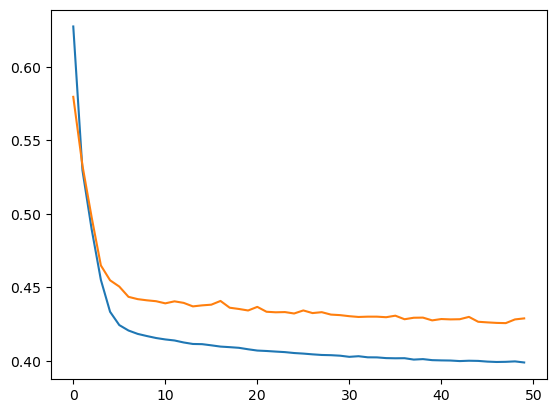

In [68]:
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])

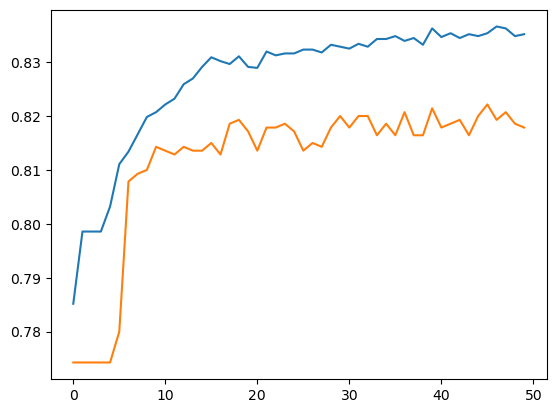

In [69]:
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])